# **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 140 

# Load the Dataset

In [ ]:
ratings_file = '/content/sample_data/fitness_exercises 2.csv'

df_ratings = pd.read_csv(ratings_file)

df_ratings.head()

,bodyPart,equipment,gifUrl,id,name,target,rating
0,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0001.gif,1,3/4 sit-up,abs,4.0
1,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0002.gif,2,45° side bend,abs,4.0
2,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0003.gif,3,air bike,abs,4.0
3,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/1512.gif,1512,all fours squad stretch,quads,4.0
4,waist,body weight,http://d205bpvrqc9yn1.cloudfront.net/0006.gif,6,alternate heel touchers,abs,4.0


In [ ]:
df_ratings.info()
#Check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bodyPart   1327 non-null   object 
 1   equipment  1327 non-null   object 
 2   gifUrl     1327 non-null   object 
 3   id         1327 non-null   int64  
 4   name       1327 non-null   object 
 5   target     1327 non-null   object 
 6   rating     1323 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 72.7+ KB


In [ ]:
df_ratings.describe()['rating'].T
# describe rating in point summary

count    1323.000000
mean        3.387755
std         1.391046
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df_ratings.rating.min()))
print('Maximum rating is: %d' %(df_ratings.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [ ]:
#checking missing values
print('Number of missing values across columns: \n',df_ratings.isnull().sum())

Number of missing values across columns: 
 bodyPart     0
equipment    0
gifUrl       0
id           0
name         0
target       0
rating       4
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


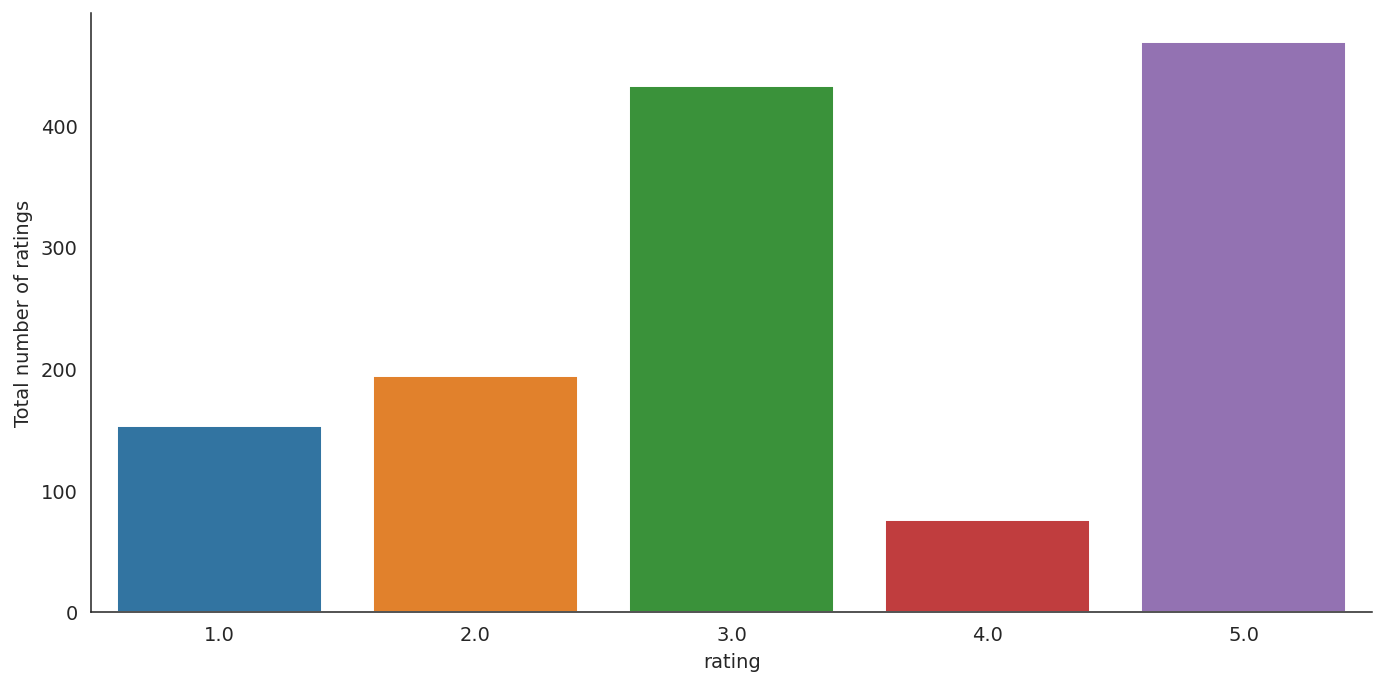

In [ ]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
#Analysis of rating given by the Gymtrainer according to the exercise
no_of_rated_products_per_user = df_ratings.groupby(by='id')['rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

id
1       1
1423    1
1421    1
1420    1
1419    1
Name: rating, dtype: int64

In [ ]:
# rating of bodyparts used by the user
df_ratings['bodyPart'].value_counts()

upper arms    292
upper legs    227
back          203
waist         170
chest         164
shoulders     144
lower legs     59
lower arms     37
cardio         29
neck            2
Name: bodyPart, dtype: int64

In [ ]:
# rating of equipment used by the user
df_ratings['equipment'].value_counts()

body weight             325
dumbbell                294
cable                   157
barbell                 154
leverage machine         84
band                     54
smith machine            48
kettlebell               41
weighted                 36
stability ball           28
ez barbell               23
sled machine             15
assisted                 15
medicine ball            13
rope                     10
roller                    8
resistance band           7
bosu ball                 3
wheel roller              2
olympic barbell           2
hammer                    1
skierg machine            1
upper body ergometer      1
stationary bike           1
tire                      1
trap bar                  1
elliptical machine        1
stepmill machine          1
Name: equipment, dtype: int64

In [ ]:
# rating of user achieved by target or not.
df_ratings['target'].value_counts()

abs                      170
pectorals                159
biceps                   151
glutes                   144
delts                    144
triceps                  141
upper back                88
lats                      81
calves                    59
quads                     44
forearms                  37
cardiovascular system     29
hamstrings                28
spine                     19
traps                     15
adductors                  6
serratus anterior          5
abductors                  5
levator scapulae           2
Name: target, dtype: int64

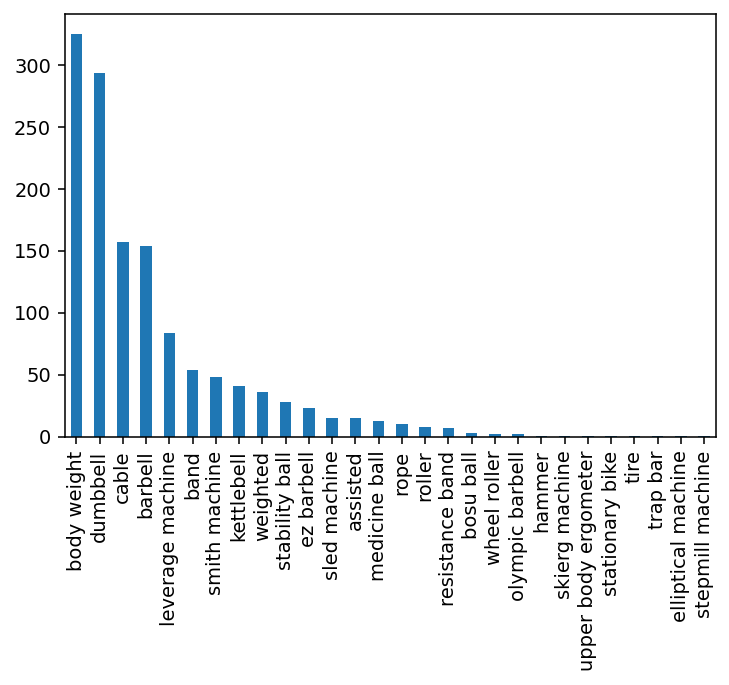

In [ ]:
# plot the graph according to rating
df_ratings['equipment'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

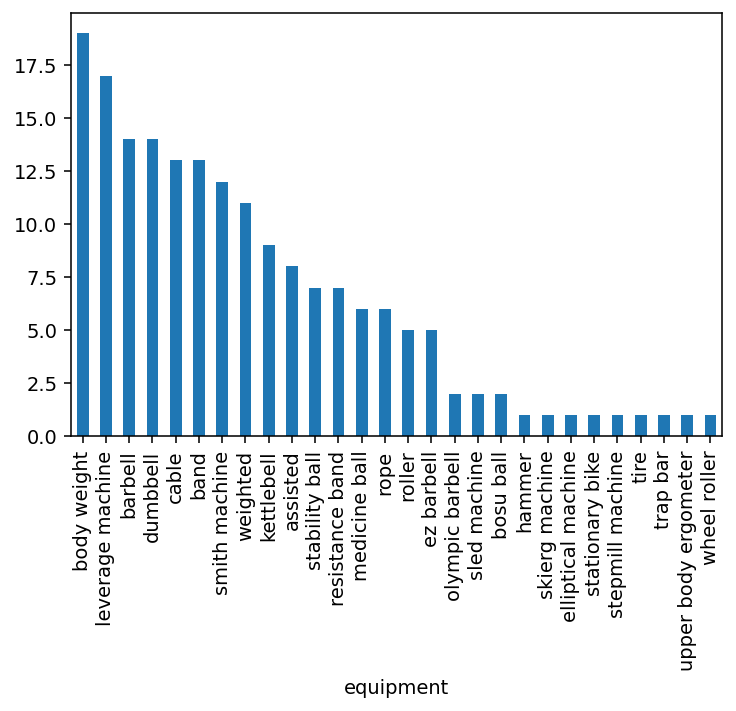

In [ ]:
# graph ratings of equipment used verses target achieved by user.
df_ratings.groupby(['equipment'], group_keys=False)['target'].nunique().sort_values(ascending=False).plot.bar()

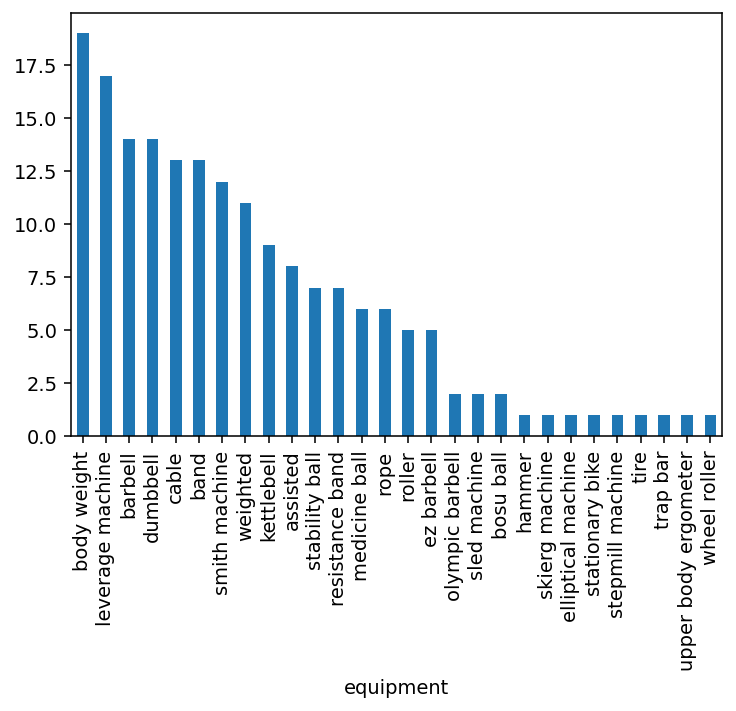

In [ ]:
df_ratings.groupby(['equipment'], group_keys=False)['target'].nunique().sort_values(ascending=False).plot.bar()

In [ ]:
# count of ratings according to the exercise.
name_counts = df_ratings['name'].value_counts()
name_counts

self assisted inverse leg curl    2
smith reverse calf raises         2
ez barbell spider curl            2
barbell seated calf raise         2
push-up (on stability ball)       2
                                 ..
close-grip push-up                1
close grip chin-up                1
clock push-up                     1
clap push up                      1
wrist rollerer                    1
Name: name, Length: 1322, dtype: int64

In [ ]:
# define total parameter in rows and columns
name_counts.value_counts()

1    1317
2       5
Name: name, dtype: int64

In [ ]:
# index countings in name column
dupe_name = name_counts.index[name_counts == 2]
dupe_name

Index(['self assisted inverse leg curl', 'smith reverse calf raises',
       'ez barbell spider curl', 'barbell seated calf raise',
       'push-up (on stability ball)'],
      dtype='object')

In [ ]:
# rating according to location is name column
df_ratings.loc[df_ratings['name'].isin(dupe_name)]

,bodyPart,equipment,gifUrl,id,name,target,rating
185,lower legs,barbell,http://d205bpvrqc9yn1.cloudfront.net/0088.gif,88,barbell seated calf raise,calves,5.0
186,lower legs,barbell,http://d205bpvrqc9yn1.cloudfront.net/1371.gif,1371,barbell seated calf raise,calves,5.0
790,upper arms,ez barbell,http://d205bpvrqc9yn1.cloudfront.net/0454.gif,454,ez barbell spider curl,biceps,3.0
791,upper arms,ez barbell,http://d205bpvrqc9yn1.cloudfront.net/1628.gif,1628,ez barbell spider curl,biceps,3.0
1068,chest,stability ball,http://d205bpvrqc9yn1.cloudfront.net/0655.gif,655,push-up (on stability ball),pectorals,1.0
1069,chest,stability ball,http://d205bpvrqc9yn1.cloudfront.net/0656.gif,656,push-up (on stability ball),pectorals,1.0
1127,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/0697.gif,697,self assisted inverse leg curl,hamstrings,4.0
1128,upper legs,body weight,http://d205bpvrqc9yn1.cloudfront.net/1766.gif,1766,self assisted inverse leg curl,hamstrings,4.0
1200,lower legs,smith machine,http://d205bpvrqc9yn1.cloudfront.net/0763.gif,763,smith reverse calf raises,calves,2.0
1201,lower legs,smith machine,http://d205bpvrqc9yn1.cloudfront.net/1394.gif,1394,smith reverse calf raises,calves,2.0


In [ ]:
#Getting the new dataframe which contains users who has given 50 or more ratings
new_df=df_ratings.groupby("equipment").filter(lambda x:x['target'].count() >=50)

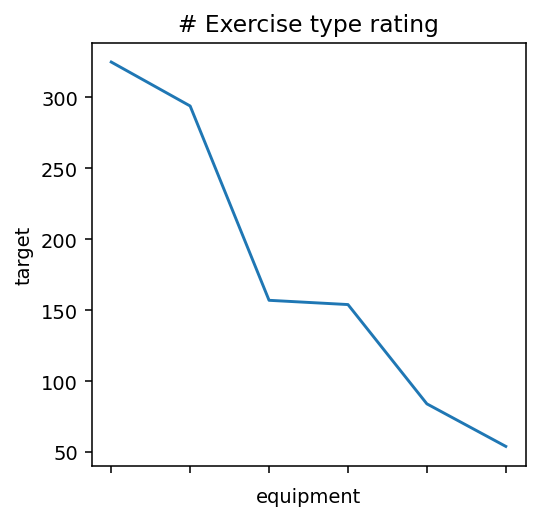

In [ ]:
# plot the graph equipment vls target
no_of_ratings_per_product = new_df.groupby(by='equipment')['target'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# Exercise type rating')
plt.xlabel('equipment')
plt.ylabel('target')
ax.set_xticklabels([])

plt.show()

In [ ]:
#Average rating of the product 
new_df.groupby('id')['rating'].mean().head()

id
1    4.0
2    4.0
3    4.0
6    4.0
7    4.0
Name: rating, dtype: float64

In [ ]:
# max rating on which user id
new_df.groupby('id')['rating'].mean().sort_values(ascending=False).head()

id
860     5.0
277     5.0
1649    5.0
1650    5.0
1651    5.0
Name: rating, dtype: float64

In [ ]:
#Total no of rating for product
new_df.groupby('id')['rating'].count().sort_values(ascending=False).head()

id
1       1
1423    1
1407    1
1408    1
1409    1
Name: rating, dtype: int64

In [ ]:
# data frame of id and rating into mean values
ratings_mean_count = pd.DataFrame(new_df.groupby('id')['rating'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('id')['rating'].count())

In [ ]:
ratings_mean_count.head()

,rating,rating_counts
id,,
1,4.0,1
2,4.0,1
3,4.0,1
6,4.0,1
7,4.0,1


In [ ]:
# max rating count 
ratings_mean_count['rating_counts'].max()

1

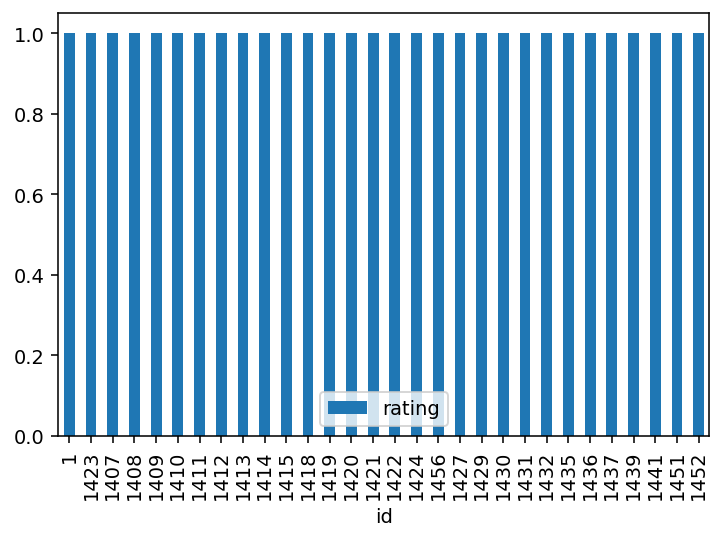

In [ ]:
# popular exercise when most like used by user
popular_exercise = pd.DataFrame(new_df.groupby('id')['rating'].count())
most_popular = popular_exercise.sort_values('rating', ascending=False)

most_popular.head(30).plot(kind = "bar")

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Collaberative filtering (Item-Item recommedation)**

In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
# Surprise provides various tools to run cross-validation procedures and search the best parameters for a prediction algorithm. The tools presented here are all heavily inspired from the excellent scikit learn library.

In [ ]:
# user read the rating scale
reader = Reader(line_format = 'user item rating', rating_scale=(0,5))

In [ ]:
# KNN is a non-parametric method used for classification. It is also one of the best-known classification algorithms. The principle is that known data are arranged in a space defined by the selected features.
algo = KNNWithMeans(k=2, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit

<bound method KNNWithMeans.fit of <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7faa2c0e7f50>>

In [ ]:
test_pred = algo.test

In [ ]:
test_pred

<bound method AlgoBase.test of <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7faa2c0e7f50>>

In [ ]:
print("Item-based Model : Test Set")
accuracy.rmse
# 1.3436 accuracy 

Item-based Model : Test Set


<function surprise.accuracy.rmse>

# **Model-based collaborative filtering system**

In [ ]:
# rating matrix form in row and column.
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='rating', index='id', columns='equipment', fill_value=0)
ratings_matrix.head()
# the below matrix is sparse with unknown values 0

equipment,band,barbell,body weight,cable,dumbbell,leverage machine
id,,,,,,
1,0,0,4,0,0,0
2,0,0,4,0,0,0
3,0,0,4,0,0,0
6,0,0,4,0,0,0
7,0,0,0,4,0,0


In [ ]:
ratings_matrix.shape


(1065, 6)

In [ ]:
#Transposing the matrix
X = ratings_matrix.T
X.head()

id,1,2,3,6,7,9,15,17,19,20,...,3697,3698,3699,3758,3759,3760,3769,3785,3888,5201
equipment,,,,,,,,,,,,,,,,,,,,,
band,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
barbell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
body weight,4,4,4,4,0,0,0,0,0,5,...,0,3,2,0,0,0,5,3,0,0
cable,0,0,0,0,4,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
dumbbell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [ ]:
X.shape

(6, 1065)

In [ ]:
X1 = X

In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(6, 6)

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(6, 6)

In [ ]:
X.index[5]

'leverage machine'

In [ ]:
i = "leverage machine"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

5

In [ ]:
# Correlation for all equipments with the equipment used by this user based on items rated by other user people who done the same exercise
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(6,)

In [ ]:
# recommend the top equipment used by the user.
Recommend = list(X.index[correlation_product_ID > 0.3])

# Removes the exercise already done by the user
# Recommend.remove(i) 


Recommend[0:2]

['leverage machine']